In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
train= pd.read_csv("/content/SalaryData_Train.csv",encoding = "ISO-8859-1")
test= pd.read_csv("/content/SalaryData_Test.csv",encoding = "ISO-8859-1")

In [16]:
df= pd.concat([train,test], axis = 0).reset_index(drop = True)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
df=df.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'],axis=1)

In [35]:
df.isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           1
dtype: int64

In [36]:
df1=df.dropna()

In [37]:
df1.isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33704 entries, 0 to 15059
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   workclass      33704 non-null  object
 1   education      33704 non-null  object
 2   maritalstatus  33704 non-null  object
 3   occupation     33704 non-null  object
 4   relationship   33704 non-null  object
 5   race           33704 non-null  object
 6   sex            33704 non-null  object
 7   native         33704 non-null  object
 8   Salary         33704 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [38]:
df1[df1.duplicated()].shape

(24497, 9)

In [17]:
df1.drop_duplicates()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
15023,Private,Bachelors,Divorced,Tech-support,Not-in-family,White,Male,United-States,<=50K
15024,Federal-gov,Masters,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
15029,Private,11th,Separated,Craft-repair,Not-in-family,White,Male,Mexico,<=50K
15054,Local-gov,Masters,Divorced,Other-service,Not-in-family,White,Male,United-States,<=50K


<Axes: >

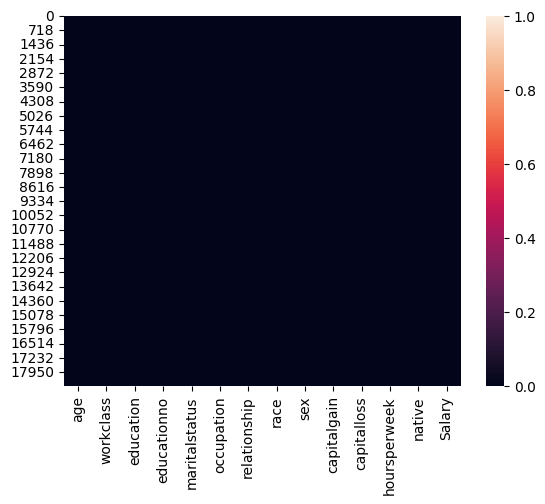

In [39]:
import seaborn as sns
sns.heatmap(train.isnull())

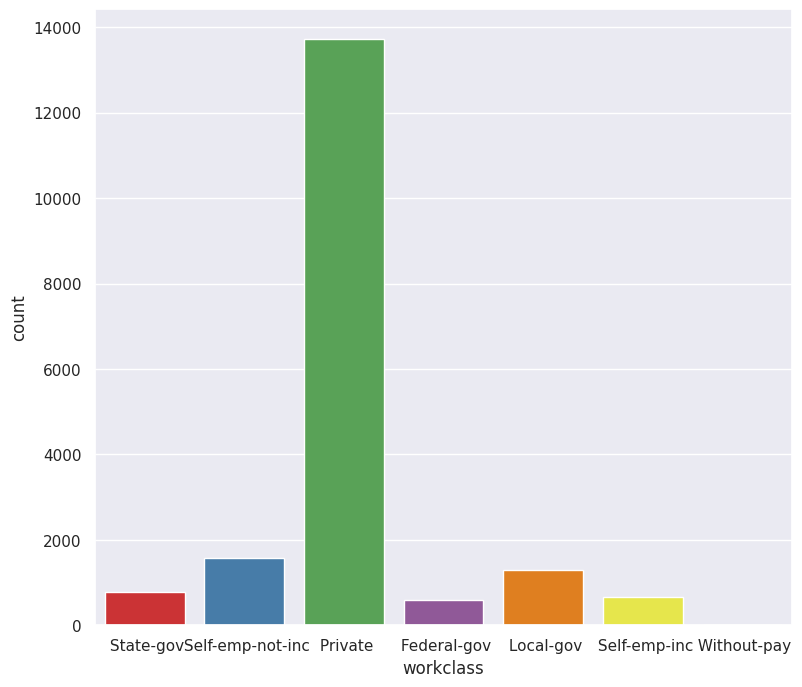

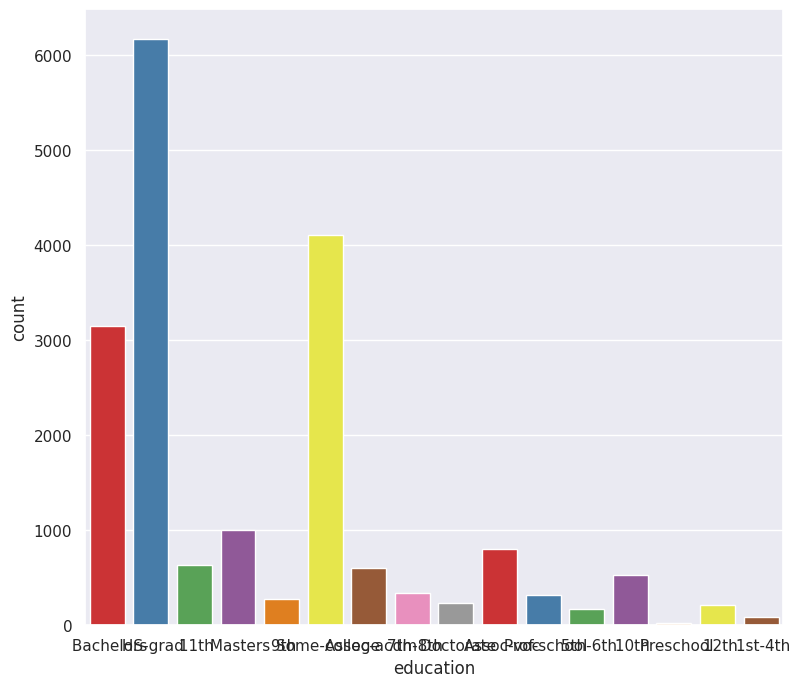

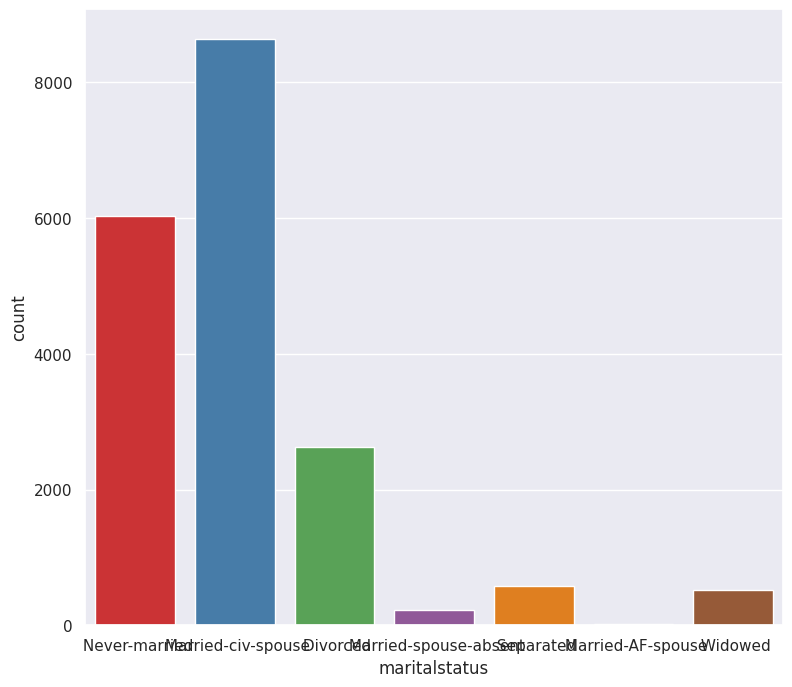

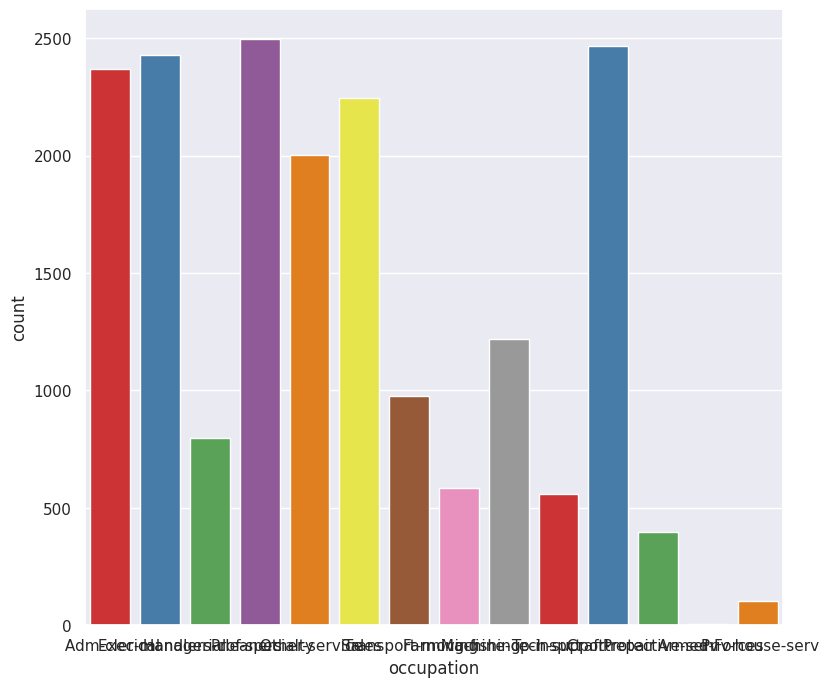

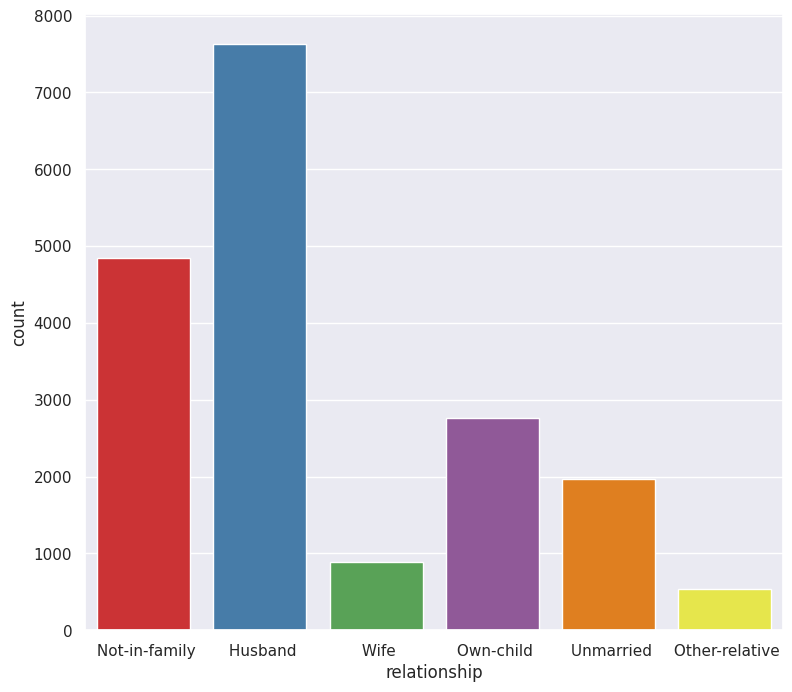

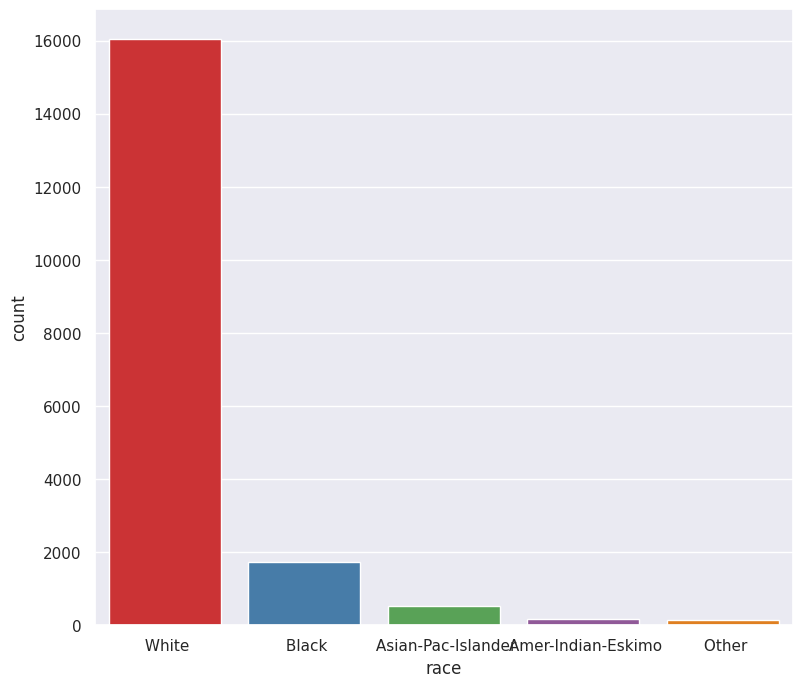

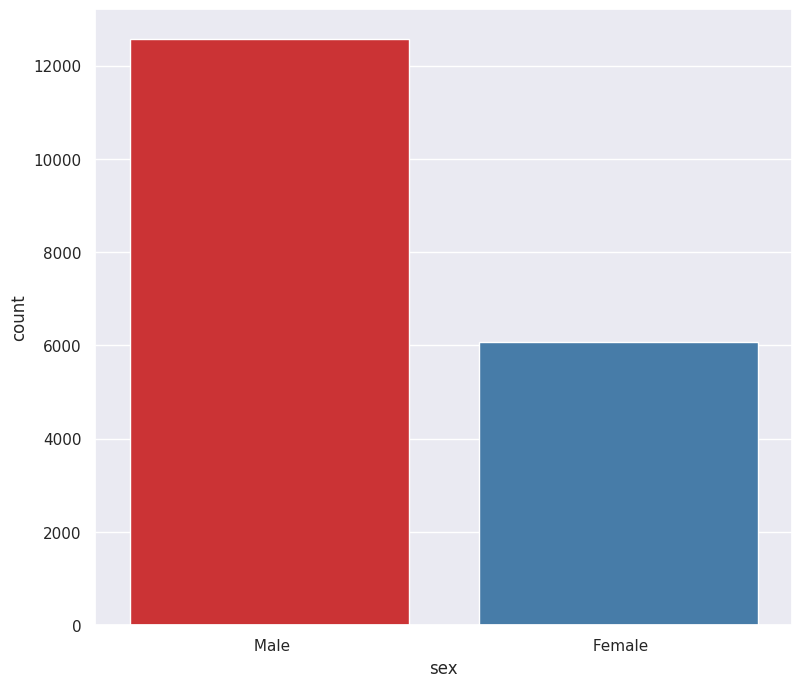

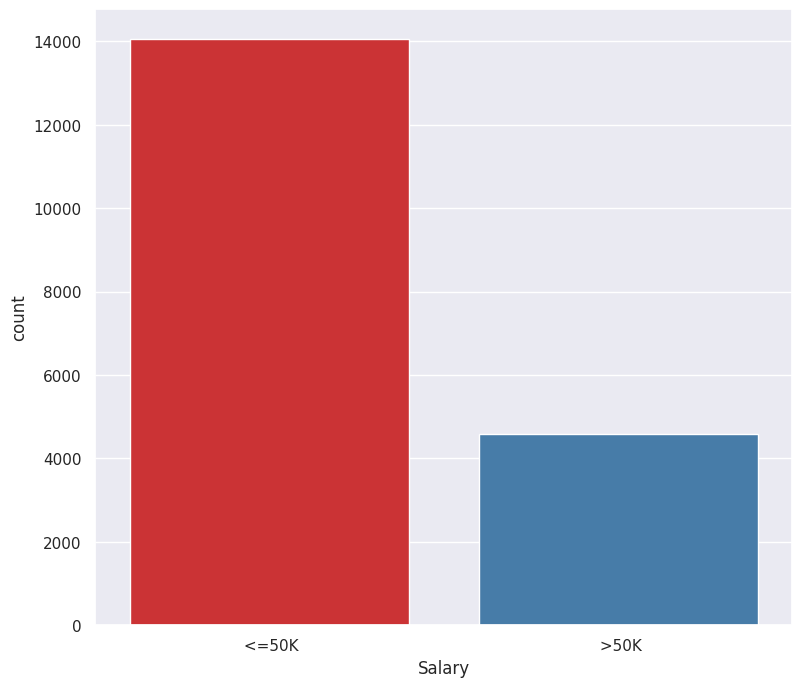

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,8)})
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure()
    sns.countplot(x = col, data = train, palette = 'Set1');

In [49]:
df_train = train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,21,0,39,38,0
1,33,4,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [50]:
df_test = test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [53]:
X_train= df_train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train= df_train['Salary'].values

In [54]:
X_test= df_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test= df_test['Salary'].values

In [55]:
from sklearn.naive_bayes import MultinomialNB as MB
import numpy as np
classifier_mb = MB()
classifier_mb.fit(X_train, Y_train)
classifier_mb.score(X_train, Y_train)
classifier_mb.score(X_test, Y_test)
predicted_result = classifier_mb.predict(X_train)
accuracy_train = np.mean(predicted_result == Y_train)
accuracy_train

0.7825154196835613

In [56]:
test_predict=classifier_mb.predict(X_test)
accuracy_test = np.mean(test_predict== Y_test)
accuracy_test

0.7810756972111553